In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
aus_open_men=pd.read_csv("D:/SHREY AGARWAL/Documents/AusOpen-men-2013.csv")
aus_open_women=pd.read_csv("D:/SHREY AGARWAL/Documents/AusOpen-women-2013.csv")
french_open_men=pd.read_csv("D:/SHREY AGARWAL/Documents/FrenchOpen-men-2013.csv")
french_open_women=pd.read_csv("D:/SHREY AGARWAL/Documents/FrenchOpen-women-2013.csv")   
us_open_men=pd.read_csv("D:/SHREY AGARWAL/Documents/USOpen-men-2013.csv")
us_open_women=pd.read_csv("D:/SHREY AGARWAL/Documents/USOpen-women-2013.csv")
wimbledon_men=pd.read_csv("D:/SHREY AGARWAL/Documents/Wimbledon-men-2013.csv")
wimbledon_women=pd.read_csv("D:/SHREY AGARWAL/Documents/Wimbledon-women-2013.csv")

In [4]:
french_open_men=french_open_men.replace(np.nan,0)  
french_open_men=french_open_men.replace(np.inf,0)
french_open_women=french_open_men.replace(np.nan,0)  
french_open_women=french_open_men.replace(np.inf,0)

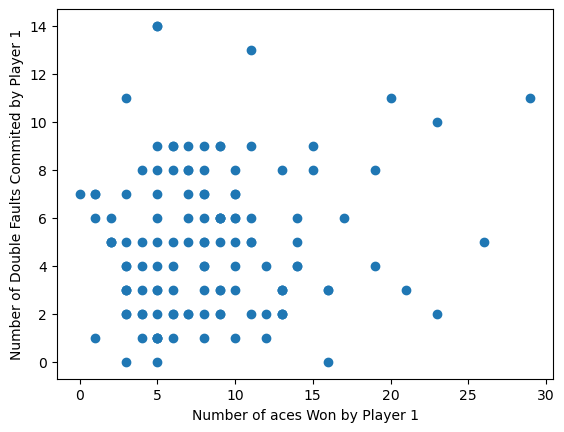

The correlation between the Aces and Double Faults by Player 1 is :
0.10858684586418245


In [6]:
#Show the relation between the Aces and double faults won by player 1.What is the correlation between them.
import pandas as pd
import matplotlib.pyplot as plt
X_ace=us_open_men['ACE.1']
X_double=us_open_men['DBF.1']
result=us_open_men['Result']


plt.scatter(X_ace, X_double)
plt.xlabel('Number of aces Won by Player 1')
plt.ylabel('Number of Double Faults Commited by Player 1')
plt.show()

cor=X_ace.corr(X_double)
print("The correlation between the Aces and Double Faults by Player 1 is :")
print(cor)



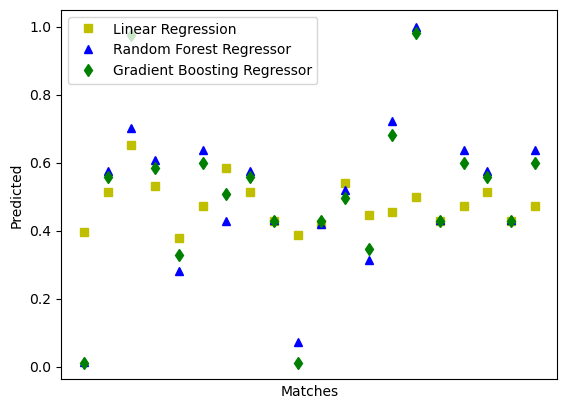

Linear Regression error: 0.24591750322118824
Random Forest Regressor error: 0.19633618854212986
Gradient Boosting Regressor error: 0.19449598145100022


In [29]:
# Can the outcome of the French Open Women's tennis tournament be predicted based on the Break Points factor, similar to the approach used for the French Open Men's tournament?
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

french_open_women['Avg Break points'] = (french_open_women['BPW.1'] + french_open_women['BPW.2']) / 2
french_open_men['Avg Break points'] = (french_open_men['BPW.1'] + french_open_men['BPW.2']) / 2\

#Linear Regression Model
lr = LinearRegression()
lr.fit(french_open_men[['Avg Break points']], french_open_men['Result'])
lr_pred = lr.predict(french_open_women[['Avg Break points']])
lr_error = mean_squared_error(french_open_women['Result'], lr_pred)

# Fit Random Forest Regressor model
rf = RandomForestRegressor(random_state=1)
rf.fit(french_open_men[['Avg Break points']], french_open_men['Result'])
rf_pred = rf.predict(french_open_women[['Avg Break points']])
rf_error = mean_squared_error(french_open_women['Result'], rf_pred)

# Fit Gradient Boosting Regressor model
gb = GradientBoostingRegressor(random_state=1)
gb.fit(french_open_men[['Avg Break points']], french_open_men['Result'])
gb_pred = gb.predict(french_open_women[['Avg Break points']])
gb_error = mean_squared_error(french_open_women['Result'], gb_pred)


gb_pred_20 = gb.predict(french_open_women[['Avg Break points']][:20])
lr_pred_20 = lr.predict(french_open_women[['Avg Break points']][:20])
rf_pred_20 = rf.predict(french_open_women[['Avg Break points']][:20])
# Plot the predicted results of the three models
plt.figure()
plt.plot(lr_pred_20, "ys", label="Linear Regression")
plt.plot(rf_pred_20, "b^", label="Random Forest Regressor")
plt.plot(gb_pred_20, "gd", label="Gradient Boosting Regressor")
plt.legend()

# Remove x-axis ticks and labels
plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)  
plt.ylabel("Predicted")
plt.xlabel("Matches")
plt.show()

# Remove the added column from french_open_women DataFrame
french_open_women.drop(columns=['Avg Break points'], inplace=True)

# Print mean squared errors of the three models
print("Linear Regression error:", lr_error)
print("Random Forest Regressor error:", rf_error)
print("Gradient Boosting Regressor error:", gb_error)


Round  Result
1      0         35
       1         29
2      0         12
       1         20
3      0          6
       1         10
4      0          5
       1          3
5      0          2
       1          2
6      0          1
       1          1
7      1          1
Name: Result, dtype: int64


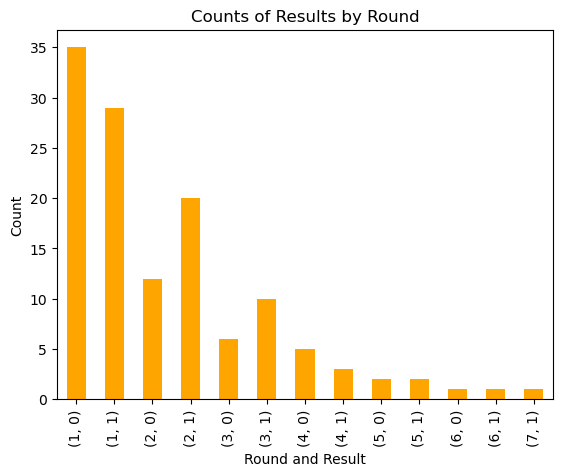

In [7]:
#What is the frequency distribution of the number of wins for Player 1 and Player 2 in each round of the game?

d=aus_open_women[['Round','Result']]
d=d.groupby(['Round','Result']).Result.count()
ax = d.plot(kind='bar', color='orange')
ax.set_xlabel('Round and Result')
ax.set_ylabel('Count')
ax.set_title('Counts of Results by Round')
plt.show()

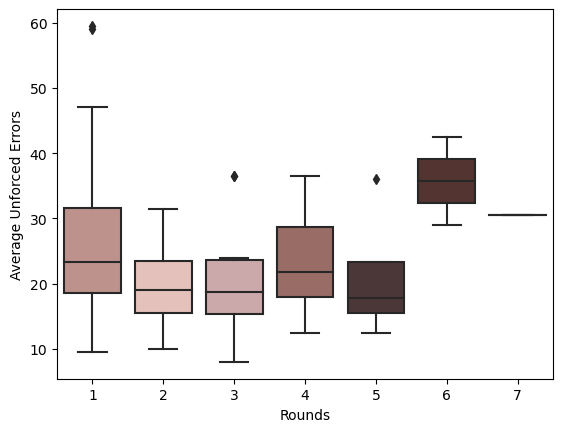

In [8]:
#What is the variability and central tendency of the average number of unforced errors made by the players in each round,
wimbledon_men['Avg_errors']=(wimbledon_men['UFE.1']+wimbledon_men['UFE.2'])/2
colours=['#c58c85', '#ecbcb4', '#d1a3a4', '#a1665e', '#503335', '#592f2a']
sns.boxplot(x='Round',y='Avg_errors',data=wimbledon_men,palette=colours)
plt.xlabel('Rounds')
plt.ylabel('Average Unforced Errors')
plt.show()

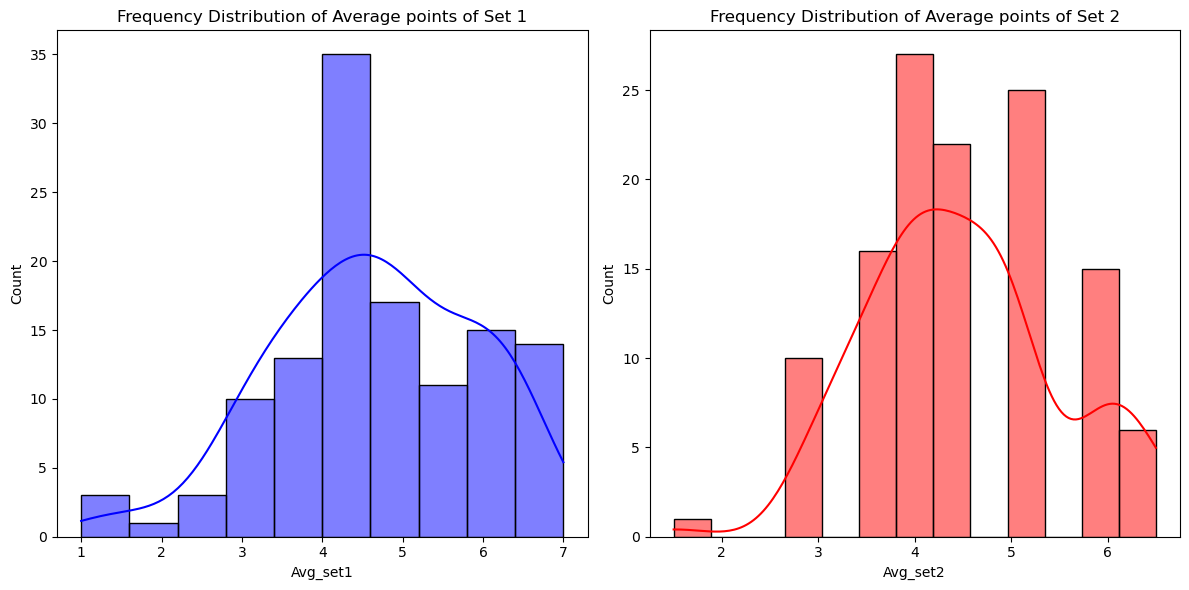

In [9]:
#Compare the frequency distribution of average results of Set 1 and Set 2.In what range the results are the highest?
wimbledon_women['Avg_set1'] = (wimbledon_women['ST1.1'] + wimbledon_women['ST2.2']) / 2
wimbledon_women['Avg_set2'] = (wimbledon_women['ST2.1'] + wimbledon_women['ST2.2']) / 2

plt.figure(figsize=(12,6)) 

plt.subplot(1, 2, 1) 
sns.histplot(wimbledon_women['Avg_set1'], kde=True, color='blue')
plt.title('Frequency Distribution of Average points of Set 1')

plt.subplot(1, 2, 2)
sns.histplot(wimbledon_women['Avg_set2'], kde=True, color='red')
plt.title('Frequency Distribution of Average points of Set 2')

plt.tight_layout() 
plt.show()


     FSW.1  SSW.1
0       35     18
1       31     13
2       53     20
3       39     24
4       63     12
..     ...    ...
121     60     28
122     66     22
123     71     30
124     41     22
125     50     10

[126 rows x 2 columns]


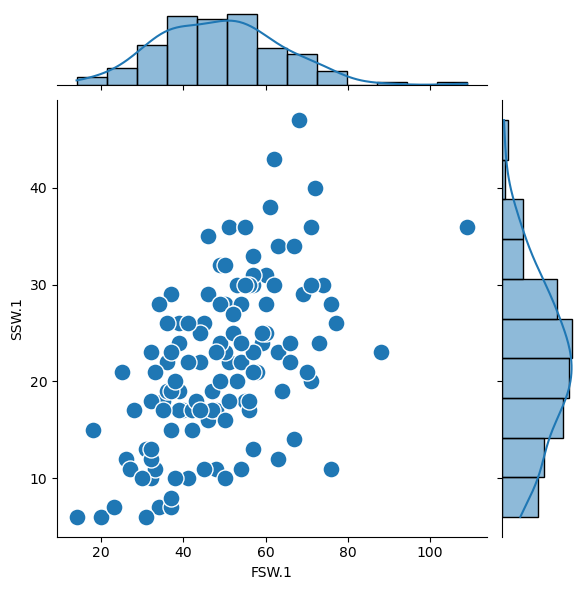

In [7]:
#Is there a correlation between a tennis player's first serve win and second serve win?
x=aus_open_men[['FSW.1','SSW.1']]
print(x)
p=sns.JointGrid(data=x,x='FSW.1',y='SSW.1')
p.plot_joint(sns.scatterplot,s=150)
p.plot_marginals(sns.histplot, kde=True)

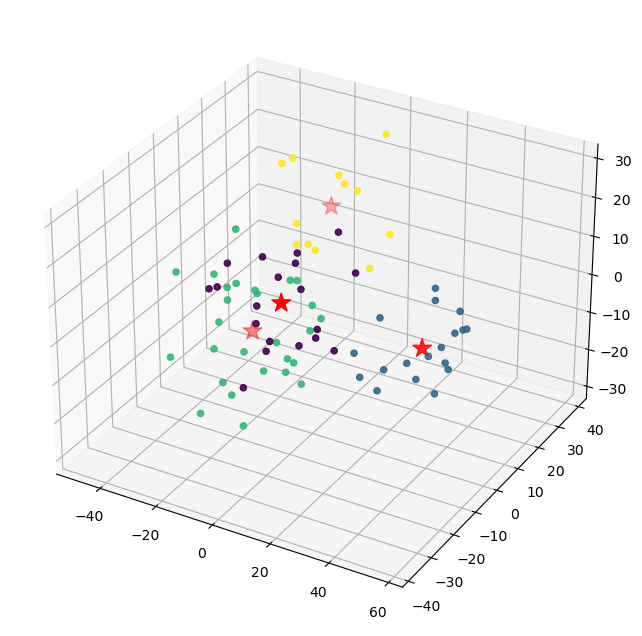

In [17]:
#What are the key statistical factors that contribute to successful tennis performance?
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

us_open_women=us_open_women.replace(np.nan,0)
us_open_women=us_open_women.replace(np.inf,0)

pca=PCA(n_components=3)
X_pca=pca.fit_transform(us_open_women)
kmeans=KMeans(n_clusters=4,random_state=0)
kmeans.fit(X_pca)
cen=kmeans.cluster_centers_
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2],c=kmeans.labels_,alpha=0.9)
ax.scatter(cen[:,0],cen[:,1],cen[:,2],marker='*',s=200,c='red')
plt.show()

Text(0.5, 1.0, 'Second Serve won by Player 2')

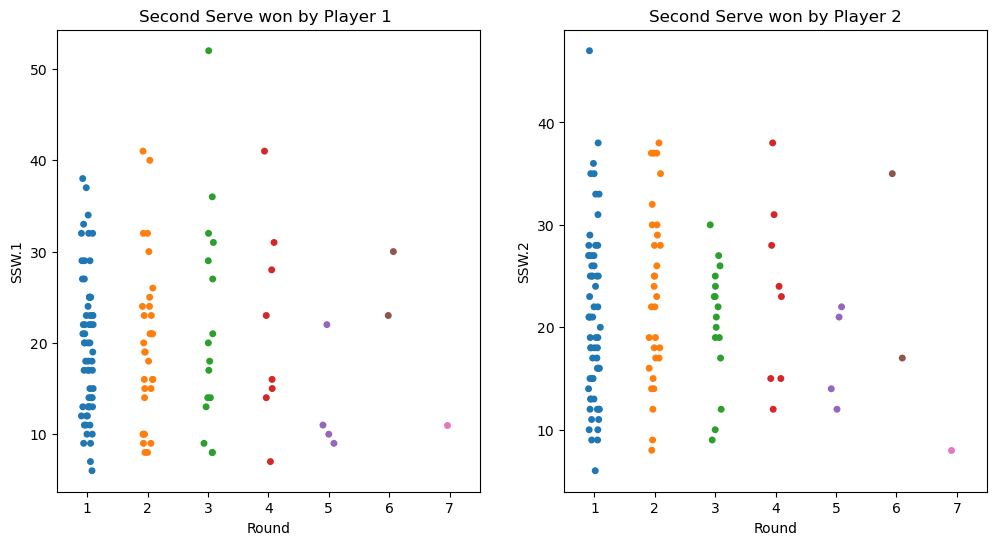

In [25]:
#Is there a statistically significant difference in second serve win percentages of both players across different rounds of a tennis tournament?
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.stripplot(x=french_open_women['Round'],y=french_open_women['SSW.1'])
plt.title('Second Serve won by Player 1 ')
plt.subplot(1,2,2)
sns.stripplot(x=french_open_women['Round'],y=french_open_women['SSW.2'])
plt.title('Second Serve won by Player 2')